# Binary Image Processing

## Read Image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

MOON_IMG = "moon_bw.jpg"
SPIDERMAN_IMG = "brandNewDay.png"
NATURE_IMG = "nature.jpg"
SUNSET_D_IMG = "sunset_dark.jpg"
SUNSET_B_IMG = "sunset_bright.jpg"
MOUNTAIN_IMG = "mountainSlit.jpg"
PROCESS_IMG = MOUNTAIN_IMG

In [328]:
img = plt.imread(PROCESS_IMG)
img.shape

(3648, 5472, 3)

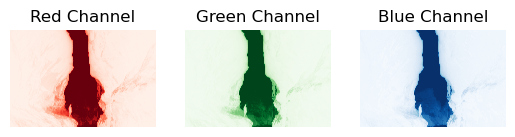

In [346]:
R_channel = img[:, :, 0]
G_channel = img[:, :, 1]
B_channel = img[:, :, 2]

_= plt.subplot(1, 3, 1)
_= plt.title("Red Channel")
_= plt.imshow(R_channel, cmap='Reds')
_= plt.axis('off')
_= plt.subplot(1, 3, 2)
_= plt.title("Green Channel")
_= plt.imshow(G_channel, cmap='Greens')
_= plt.axis('off')
_= plt.subplot(1, 3, 3)
_= plt.title("Blue Channel")
_= plt.imshow(B_channel, cmap='Blues')
_= plt.axis('off')

In [330]:
np.all(R_channel == G_channel), np.all(G_channel == B_channel), np.all(R_channel == B_channel)

(False, False, False)

In [331]:
R_channel.shape

(3648, 5472)

In [332]:
def plot_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

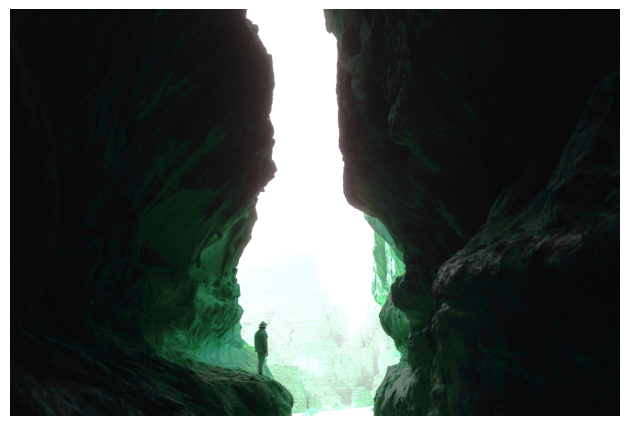

In [333]:
# What if I interchange Channels ? 

weirdStack1 = np.stack([B_channel, R_channel, G_channel], axis=-1)
plot_image(weirdStack1)

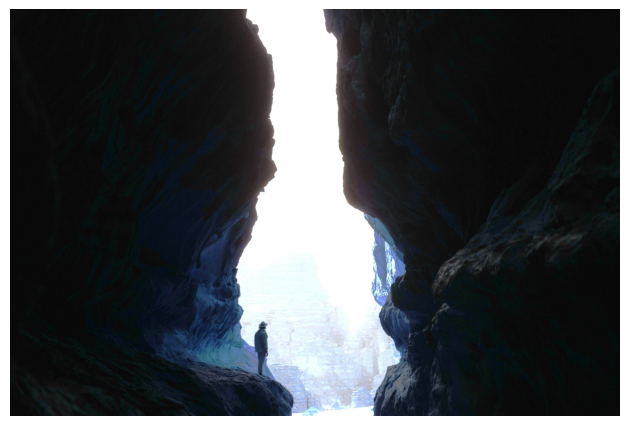

In [334]:
plot_image(np.stack([B_channel, G_channel, R_channel], axis=-1))

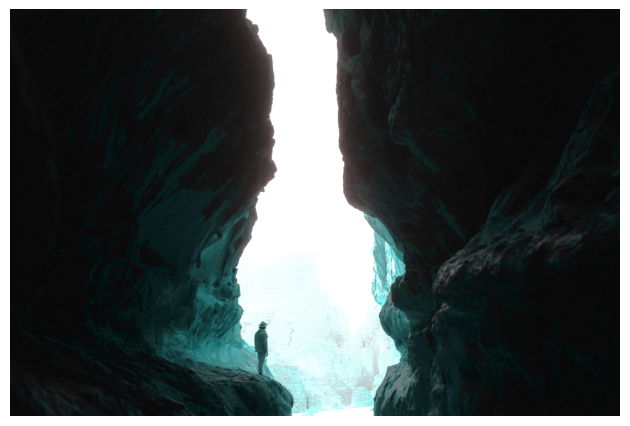

In [335]:
plot_image(np.stack([B_channel, R_channel, R_channel], axis=-1))

In [347]:
(R_channel.min(), R_channel.max()), (G_channel.min(), G_channel.max()), (B_channel.min(), B_channel.max())

((0, 255), (0, 255), (0, 255))

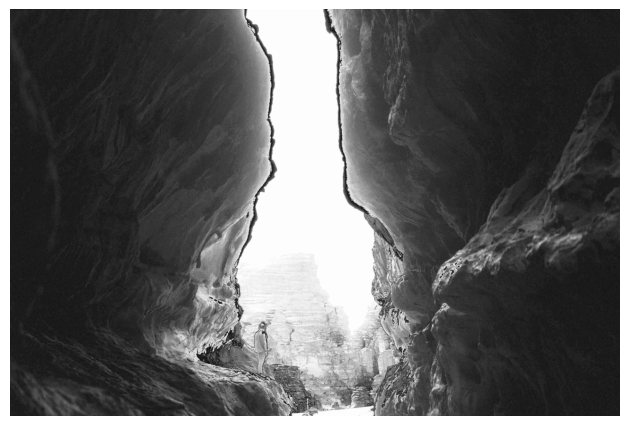

(3648, 5472)

In [337]:
# creating BW as average of 3 channels 

BW_img = (R_channel + G_channel + B_channel) / 3
plot_image(BW_img, cmap='gray')
BW_img.shape

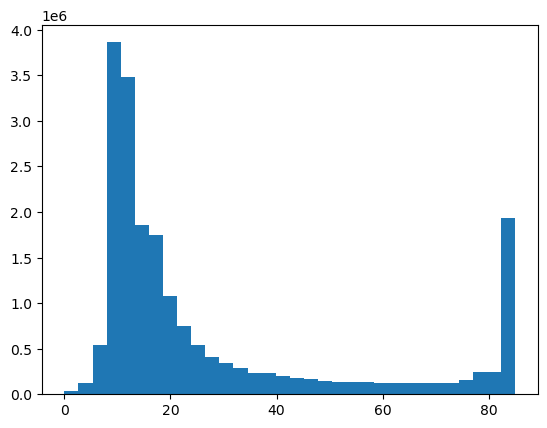

In [348]:
_= plt.hist(BW_img.ravel(), bins=32)

In [339]:
BW_img.dtype
BW_img.min(), BW_img.max()

dtype('float64')

(0.0, 85.0)

(0.0, 255.0)

(0, 255)

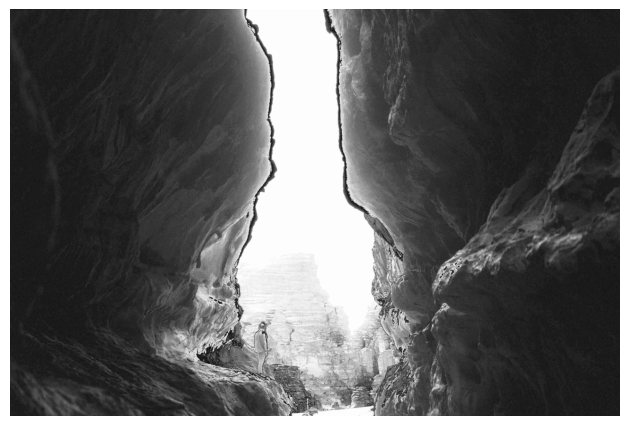

In [340]:
K = 255
diff = BW_img.max() - BW_img.min()
# convert float to int by scaling it into 0 to K
img_bw = BW_img * K / diff
img_bw.min(), img_bw.max()

img_bw = img_bw.astype(np.uint8)
img_bw.min(), img_bw.max()
plot_image(img_bw, cmap='gray')

## Convert GrayScale image to Binary Image

### Histogram

In [341]:
img_bw.shape, img_bw.min(), img_bw.max(), img_bw.dtype

((3648, 5472), 0, 255, dtype('uint8'))

In [342]:
intensities = np.unique(img_bw)
len(intensities)

256

<BarContainer object of 256 artists>

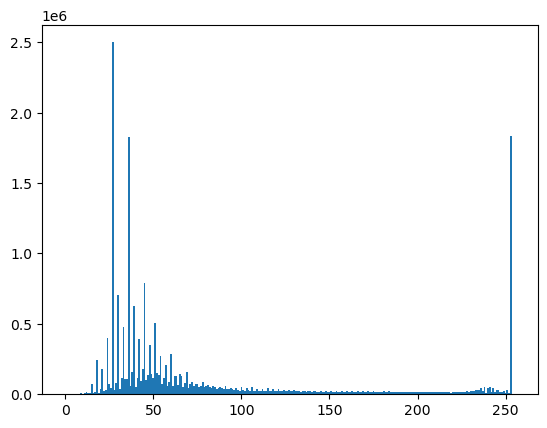

In [343]:
hist = {}
for i in intensities:
    hist[i] = np.sum(img_bw == i)

plt.bar(hist.keys(), hist.values(), width=1.0)

### Otsu's Thresholding